In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("./DIWBB_Training.csv")
df.head(10)

C:\Users\gauta\AppData\Local\Temp\ipykernel_21612\1429781496.py:4: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./DIWBB_Training.csv")


,RecordID,ChampionshipYear,CustomerID,CustomerCity,CustomerState,CustomerZipCode,CustomerInstitutionAffinity,IsCustomerInNCAAMembership,HasCustomerClickedOrOpenedEmailsSixMonthsPrior,CustomerFirstWBBActionDate,CustomerFirstWBBPurchaseDate,CustomerLastWBBActionDate,CustomerLastWBBPurchaseDate,EventRoundName,IsEventFinalSite,EventSession,EventBeginDate,EventEndDate,HostingInstitution,FacilityName,FacilityDescription,FacilityCity,FacilityState,FacilityZipCode,ActivityType
0,4,2022,757758,Huntsville,TX,77340,(UNK),No,(N/A),10/28/13,10/28/13,10/28/13,10/28/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
1,14,2022,574752,Salem,OR,97304,(UNK),No,Yes,10/12/19,NaN,10/12/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
2,20,2022,741837,(UNK),UNK,(UNK),(UNK),No,Yes,10/28/13,10/28/13,10/28/13,10/28/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
3,21,2022,237618,(UNK),UNK,(UNK),(UNK),No,Yes,10/28/13,10/28/13,10/28/13,10/28/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
4,23,2022,799761,(UNK),UNK,(UNK),(UNK),No,(N/A),3/20/18,3/20/18,3/20/18,3/20/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
5,27,2022,851342,(UNK),UNK,(UNK),(UNK),No,No,10/28/13,10/28/13,10/28/13,10/28/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
6,30,2022,824503,Cary,NC,27513,(UNK),No,Yes,3/19/22,NaN,3/19/22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
7,44,2022,555935,(UNK),UNK,(UNK),(UNK),No,(N/A),10/28/13,10/28/13,10/28/13,10/28/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
8,54,2022,547850,(UNK),UNK,(UNK),(UNK),No,(N/A),10/28/13,10/28/13,10/28/13,10/28/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
9,65,2022,664420,Jasper,IN,47546,(UNK),No,(N/A),4/3/16,4/3/16,4/3/16,4/3/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity


In [3]:
df.EventBeginDate.value_counts()

3/17/23    3746
3/18/22    3167
3/24/23    2053
3/19/22    1210
4/2/23     1002
3/27/23     991
3/31/23     954
4/3/22      910
4/1/22      903
3/18/23     807
3/25/23     716
3/26/23     621
3/24/22     514
3/25/22     117
3/20/22      83
3/27/22      69
3/28/22      51
3/26/22      38
3/16/23       2
3/20/23       1
Name: EventBeginDate, dtype: int64

In [4]:
df.EventEndDate.value_counts()

3/20/23    4418
3/27/23    2395
3/21/22    2187
3/20/22    1957
4/2/23     1002
3/31/23     954
4/3/22      910
4/1/22      903
3/25/23     716
3/24/23     649
3/26/23     621
3/27/22     583
3/18/22     316
3/19/23     132
3/25/22     117
3/28/22      51
3/26/22      38
3/18/23       4
3/16/23       2
Name: EventEndDate, dtype: int64

In [5]:
len(df.HostingInstitution.unique())

31

In [6]:
# Drop RecordID, CustomerID, CustomerCity, CustomerState, CustomerZipCode, CustomerInstitutionAffinity
# Categorical : IsCustomerInNCAAMembership, HasCustomerClickedOrOpenedEmailsSixMonthsPrior, EventRoundName, IsEventFinalSite, EventSession, HostingInstitution, FacilityDescription, Facility
# Convert to Time: CustomerFirstWBBActionDate, CustomerFirstWBBPurchaseDate, CustomerLastWBBActionDate, CustomerLastWBBPurchaseDate, Eve

columns_to_drop = ['RecordID', 'CustomerID', 'CustomerCity', 'CustomerState', 'CustomerZipCode', 'CustomerInstitutionAffinity', "FacilityCity", "FacilityState", 'CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 
                    'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate', "EventBeginDate", "EventEndDate"]
df1 = df.drop(columns=columns_to_drop)
#Convert Championship year

# datetime_columns = []

# for column in datetime_columns:
#     df1[column] = pd.to_datetime(df1[column])


year_mapping = {2023: 1, 2022: 0}

# Replace the values in the "ChampionshipYear" column
df1['ChampionshipYear'] = df1['ChampionshipYear'].replace(year_mapping)

membership_mapping = {'Yes': 1, 'No': 0, '(UNK)': 2}  # Assign -1 to unknown values for clarity

# Replace the values in the "IsCustomerInNCAAMembership" column
df1['IsCustomerInNCAAMembership'] = df1['IsCustomerInNCAAMembership'].replace(membership_mapping)

categorical_columns = ['HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                       'EventRoundName', 'IsEventFinalSite', 'EventSession', 'HostingInstitution', "FacilityName",
                       'FacilityDescription', "FacilityZipCode"]

df_encoded = pd.get_dummies(df1, columns=categorical_columns)
activity_mapping = {
    'No Activity': 0,
    'Primary Purchase': 1,
    'Transfer Recipient': 2,
    'Secondary Purchase': 3,
    'Multiple Activities': 4,
    'Other Secondary Activity': 5
}

# Replace the values in the "Activity" column
df_encoded['ActivityType'] = df_encoded['ActivityType'].replace(activity_mapping)
# Display the DataFrame after one-hot encoding
print(df_encoded)


        ChampionshipYear  IsCustomerInNCAAMembership  ActivityType  \
0                      0                           0             0   
1                      0                           0             0   
2                      0                           0             0   
3                      0                           0             0   
4                      0                           0             0   
...                  ...                         ...           ...   
209261                 1                           0             0   
209262                 1                           0             0   
209263                 1                           0             0   
209264                 1                           0             0   
209265                 1                           0             0   

        HasCustomerClickedOrOpenedEmailsSixMonthsPrior_(N/A)  \
0                                                       1      
1                              

In [7]:
df.ActivityType.value_counts()

No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: ActivityType, dtype: int64

In [8]:
df.HasCustomerClickedOrOpenedEmailsSixMonthsPrior.value_counts()

(N/A)    116138
Yes       56570
No        36558
Name: HasCustomerClickedOrOpenedEmailsSixMonthsPrior, dtype: int64

In [9]:
df.IsCustomerInNCAAMembership.value_counts()

No       207871
Yes        1393
(UNK)         2
Name: IsCustomerInNCAAMembership, dtype: int64

In [10]:
df.FacilityZipCode.value_counts()

98109    2365
29601    2016
75201    1956
(UNK)    1951
55403    1813
47408    1015
50011     769
02048     622
06259     601
70803     515
29201     496
85721     441
94305     393
48104     309
52242     309
99201     294
75205     273
37996     272
40202     262
27607     250
64106     220
84112     197
27403     186
76706     169
90095     148
78701     106
43210       7
Name: FacilityZipCode, dtype: int64

In [11]:
df.FacilityCity.value_counts()

Seattle           2365
Dallas            2229
Greenville        2016
Minneapolis       1813
(UNK)             1171
Bloomington       1015
Ames               769
Mansfield          622
Storrs             601
Baton Rouge        515
Columbia           496
Tucson             441
Stanford           393
Notre Dame         383
Iowa City          309
Ann Arbor          309
Spokane            294
Knoxville          272
Louisville         262
Raleigh            250
Kansas City        220
Salt Lake City     197
Greensboro         186
Norman             179
Waco               169
Los Angeles        148
Durham             129
Austin             106
Bridgeport          89
Columbus             7
Name: FacilityCity, dtype: int64

In [12]:
df.FacilityDescription.value_counts()

Professional Sports Arena    9637
College Sports Arena         7147
(UNK)                        1171
Name: FacilityDescription, dtype: int64

In [13]:
df.FacilityName.value_counts()

Climate Pledge Arena                                   2365
Bon Secours Wellness Arena                             2016
American Airlines Center                               1956
Target Center                                          1813
(UNK)                                                  1171
Simon Skjodt Assembly Hall                             1015
Hilton Coliseum                                         769
Xfinity Center                                          622
Harry A. Gampel Pavilion                                601
Pete Maravich Assembly Center                           515
Colonial Life Arena                                     496
McKale Center                                           441
Roscoe Maples Pavilion                                  393
Purcell Pavilion at the Joyce Center                    383
Carver-Hawkeye Arena                                    309
Crisler Center                                          309
Spokane Veterans Memorial Arena         

In [14]:
df.HostingInstitution.value_counts()

Seattle University                                     2365
Southern Conference                                    2016
Big 12 Conference                                      1956
University of Minnesota, Twin Cities                   1813
Indiana University, Bloomington                        1015
Louisiana State University                              891
Iowa State University                                   769
University of Connecticut                               690
University of Maryland, College Park                    622
University of South Carolina, Columbia                  496
University of Tennessee, Knoxville                      455
University of Arizona                                   441
Stanford University                                     393
Villanova University                                    387
University of Notre Dame                                383
University of Texas at Austin                           379
University of Michigan                  

In [15]:
df.EventEndDate.value_counts()

3/20/23    4418
3/27/23    2395
3/21/22    2187
3/20/22    1957
4/2/23     1002
3/31/23     954
4/3/22      910
4/1/22      903
3/25/23     716
3/24/23     649
3/26/23     621
3/27/22     583
3/18/22     316
3/19/23     132
3/25/22     117
3/28/22      51
3/26/22      38
3/18/23       4
3/16/23       2
Name: EventEndDate, dtype: int64

In [16]:
df.EventBeginDate.value_counts()

3/17/23    3746
3/18/22    3167
3/24/23    2053
3/19/22    1210
4/2/23     1002
3/27/23     991
3/31/23     954
4/3/22      910
4/1/22      903
3/18/23     807
3/25/23     716
3/26/23     621
3/24/22     514
3/25/22     117
3/20/22      83
3/27/22      69
3/28/22      51
3/26/22      38
3/16/23       2
3/20/23       1
Name: EventBeginDate, dtype: int64

In [17]:
df.EventSession.value_counts()

All-Session    9420
Session 2      3473
Session 1      3060
Session 3      1011
Session 4       991
Name: EventSession, dtype: int64

In [18]:
df.IsEventFinalSite.value_counts()

No     14186
Yes     3769
Name: IsEventFinalSite, dtype: int64

In [19]:
df.EventRoundName.value_counts()

First and Second Rounds    9014
Regionals                  5170
Finals                     3769
First Round                   2
Name: EventRoundName, dtype: int64

In [20]:
df.CustomerLastWBBPurchaseDate.value_counts()

10/28/13    126974
3/19/22       2385
3/18/22       1874
4/1/18        1706
4/2/17        1591
             ...  
1/30/23          1
9/14/22          1
12/31/22         1
1/31/23          1
12/18/22         1
Name: CustomerLastWBBPurchaseDate, Length: 1309, dtype: int64

In [21]:
df.CustomerLastWBBActionDate.value_counts()

10/28/13    126694
3/19/22       6588
3/18/22       4500
12/2/20       2409
4/1/18        1757
             ...  
3/23/13          1
12/12/21         1
1/19/23          1
4/11/22          1
6/26/22          1
Name: CustomerLastWBBActionDate, Length: 1963, dtype: int64

In [22]:
df.CustomerFirstWBBPurchaseDate.value_counts()

10/28/13    130134
3/19/22       2204
3/18/16       1665
3/20/15       1621
4/1/18        1582
             ...  
2/11/23          1
12/16/21         1
1/27/23          1
4/5/22           1
12/18/22         1
Name: CustomerFirstWBBPurchaseDate, Length: 1394, dtype: int64

In [23]:
df.CustomerFirstWBBActionDate.value_counts()

10/28/13    129994
3/19/22       6402
3/18/22       4033
3/18/16       1632
4/1/18        1632
             ...  
4/14/22          1
5/14/22          1
4/16/22          1
10/16/22         1
11/30/22         1
Name: CustomerFirstWBBActionDate, Length: 2530, dtype: int64

In [24]:
df.HasCustomerClickedOrOpenedEmailsSixMonthsPrior.value_counts()

(N/A)    116138
Yes       56570
No        36558
Name: HasCustomerClickedOrOpenedEmailsSixMonthsPrior, dtype: int64

In [25]:
df.IsCustomerInNCAAMembership.value_counts()

No       207871
Yes        1393
(UNK)         2
Name: IsCustomerInNCAAMembership, dtype: int64

In [26]:
df.CustomerInstitutionAffinity.value_counts()

(UNK)                                                  208697
University of South Carolina, Columbia                     37
University of Connecticut                                  30
University of Texas at Austin                              24
University of Nebraska-Lincoln                             23
University of Oklahoma                                     22
Louisiana State University                                 21
University of Notre Dame                                   17
Indiana University, Bloomington                            14
University of Michigan                                     13
University of California, Berkeley                         12
University of Florida                                      12
University of Iowa                                         10
University of California, Los Angeles                      10
University of Kansas                                        9
University of Wisconsin-Madison                             8
Universi

In [27]:
df.ChampionshipYear.value_counts()

2023    110673
2022     98593
Name: ChampionshipYear, dtype: int64

In [28]:
df.CustomerID.value_counts()

494708    27
619176    18
775796    16
250444    15
873575    15
          ..
198604     1
850805     1
204972     1
259906     1
867155     1
Name: CustomerID, Length: 100000, dtype: int64

In [29]:
df.CustomerState.value_counts()

UNK                135477
TX                   7954
IN                   4783
IA                   3987
WA                   3858
CA                   3619
SC                   3587
KY                   3240
NC                   2672
CT                   2468
OH                   2408
OR                   2296
MD                   2254
LA                   2061
FL                   2021
NY                   1920
MN                   1807
MI                   1710
TN                   1706
IL                   1591
AZ                   1547
MS                   1523
VA                   1378
PA                   1342
NE                   1286
GA                   1150
KS                   1063
OK                    958
CO                    857
MA                    786
NJ                    685
MO                    601
WI                    513
UT                    470
SD                    328
AL                    284
AR                    205
ID                    193
MT          

In [30]:
counts = df['CustomerState'].value_counts()
filtered_states = counts[counts > 1000].index

filtered_df = df[df['CustomerState'].isin(filtered_states)]


In [31]:
filtered_df.CustomerState.value_counts()

UNK    135477
TX       7954
IN       4783
IA       3987
WA       3858
CA       3619
SC       3587
KY       3240
NC       2672
CT       2468
OH       2408
OR       2296
MD       2254
LA       2061
FL       2021
NY       1920
MN       1807
MI       1710
TN       1706
IL       1591
AZ       1547
MS       1523
VA       1378
PA       1342
NE       1286
GA       1150
KS       1063
Name: CustomerState, dtype: int64

In [32]:
df.CustomerZipCode.value_counts()

(UNK)    135224
47401       372
39759       320
52245       252
52246       250
          ...  
75972         1
49504         1
74604         1
55932         1
77133         1
Name: CustomerZipCode, Length: 10087, dtype: int64

In [33]:
df.CustomerInstitutionAffinity.value_counts()

(UNK)                                                  208697
University of South Carolina, Columbia                     37
University of Connecticut                                  30
University of Texas at Austin                              24
University of Nebraska-Lincoln                             23
University of Oklahoma                                     22
Louisiana State University                                 21
University of Notre Dame                                   17
Indiana University, Bloomington                            14
University of Michigan                                     13
University of California, Berkeley                         12
University of Florida                                      12
University of Iowa                                         10
University of California, Los Angeles                      10
University of Kansas                                        9
University of Wisconsin-Madison                             8
Universi

In [34]:
df.ActivityType.value_counts()

No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: ActivityType, dtype: int64

In [35]:
!pip install xgboost
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\gauta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\gauta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [36]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [37]:
df1.head(50)

,ChampionshipYear,IsCustomerInNCAAMembership,HasCustomerClickedOrOpenedEmailsSixMonthsPrior,EventRoundName,IsEventFinalSite,EventSession,HostingInstitution,FacilityName,FacilityDescription,FacilityZipCode,ActivityType
0,0,0,(N/A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
1,0,0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
2,0,0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
3,0,0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
4,0,0,(N/A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
5,0,0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
6,0,0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
7,0,0,(N/A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
8,0,0,(N/A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity
9,0,0,(N/A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Activity


In [38]:
df1.ActivityType.value_counts()

No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: ActivityType, dtype: int64

In [39]:
X = df_encoded.drop('ActivityType', axis=1)  # Features
y = df_encoded['ActivityType']  # Target variable

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = xgb.XGBClassifier()
model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [41]:
y_pred = model.predict(X_test)


NameError: name 'X_test' is not defined

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824867396186744


In [ ]:
!pip install seaborn

Python(47229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


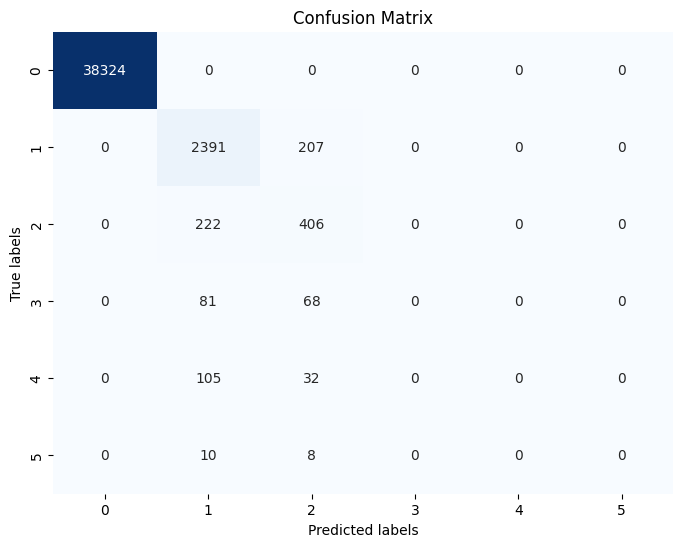

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Drop RecordID, CustomerID, CustomerCity, CustomerState, CustomerZipCode, CustomerInstitutionAffinity
# Categorical : IsCustomerInNCAAMembership, HasCustomerClickedOrOpenedEmailsSixMonthsPrior, EventRoundName, IsEventFinalSite, EventSession, HostingInstitution, FacilityDescription, Facility
# Convert to Time: CustomerFirstWBBActionDate, CustomerFirstWBBPurchaseDate, CustomerLastWBBActionDate, CustomerLastWBBPurchaseDate, Eve
df_test = pd.read_csv("DIWBB_Test.csv")
record_id = df_test.RecordID
columns_to_drop = ['RecordID', 'CustomerID', 'CustomerCity', 'CustomerState', 'CustomerZipCode', 'CustomerInstitutionAffinity', "FacilityCity", "FacilityState", 'CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 
                    'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate', "EventBeginDate", "EventEndDate"]
df_test = df_test.drop(columns=columns_to_drop)
#Convert Championship year

# datetime_columns = []

# for column in datetime_columns:
#     df1[column] = pd.to_datetime(df1[column])


year_mapping = {2023: 1, 2022: 0}

# Replace the values in the "ChampionshipYear" column
df_test['ChampionshipYear'] = df_test['ChampionshipYear'].replace(year_mapping)

membership_mapping = {'Yes': 1, 'No': 0, '(UNK)': 2}  # Assign -1 to unknown values for clarity

# Replace the values in the "IsCustomerInNCAAMembership" column
df_test['IsCustomerInNCAAMembership'] = df_test['IsCustomerInNCAAMembership'].replace(membership_mapping)

categorical_columns = ['HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                       'EventRoundName', 'IsEventFinalSite', 'EventSession', 'HostingInstitution', "FacilityName",
                       'FacilityDescription', "FacilityZipCode"]

df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns)
activity_mapping = {
    'No Activity': 0,
    'Primary Purchase': 1,
    'Transfer Recipient': 2,
    'Secondary Purchase': 3,
    'Multiple Activities': 4,
    'Other Secondary Activity': 5
}

# Replace the values in the "Activity" column
# df_test_encoded['ActivityType'] = df_test_encoded['ActivityType'].replace(activity_mapping)
# # Display the DataFrame after one-hot encoding
print(df_test_encoded)


       ChampionshipYear  IsCustomerInNCAAMembership  \
0                     0                           0   
1                     0                           0   
2                     0                           0   
3                     0                           0   
4                     0                           0   
...                 ...                         ...   
20930                 1                           0   
20931                 0                           0   
20932                 1                           0   
20933                 1                           0   
20934                 1                           0   

       HasCustomerClickedOrOpenedEmailsSixMonthsPrior_(N/A)  \
0                                                   True      
1                                                  False      
2                                                   True      
3                                                  False      
4                       

In [ ]:
df.ActivityType.value_counts()

ActivityType
No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: count, dtype: int64

In [ ]:
y_pred_test = model.predict(df_test_encoded)

In [ ]:
activity_mapping = {
    0: 'No Activity',
    1: 'Primary Purchase',
    2: 'Transfer Recipient',
    3: 'Secondary Purchase',
    4: 'Multiple Activities',
    5: 'Other Secondary Activity'
}

# Convert numerical predictions to words using the mapping dictionary
y_pred_words = [activity_mapping[pred] for pred in y_pred_test]

# Display the converted predictions
print(y_pred_words)

['No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activ

In [ ]:
submission_df = pd.DataFrame({
    'RecordID': record_id,  # Assuming record_ids contains the RecordIDs
    'ActivityType': y_pred_words # Assuming y_pred contains your predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_1.csv', index=False)

In [ ]:
len(y_pred_test)

20935

In [ ]:
%pip install keras

Python(47464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 8.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install tensorflow

Python(47467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 16.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 16.0 MB/s eta 0:00:00a 0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_random_forest.fit(X, y)

# Evaluate the mo

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_random_forest = model_random_forest.predict(df_test_encoded)


In [ ]:
activity_mapping = {
    0: 'No Activity',
    1: 'Primary Purchase',
    2: 'Transfer Recipient',
    3: 'Secondary Purchase',
    4: 'Multiple Activities',
    5: 'Other Secondary Activity'
}

# Convert numerical predictions to words using the mapping dictionary
y_pred_words_rnn = [activity_mapping[pred] for pred in y_pred_random_forest]

# Display the converted predictions
print(y_pred_words_rnn)

['No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activ

In [ ]:
submission_df = pd.DataFrame({
    'RecordID': record_id,  # Assuming record_ids contains the RecordIDs
    'ActivityType': y_pred_words_rnn # Assuming y_pred contains your predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_2.csv', index=False)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Assuming X and y contain your features and target variable respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Make predictions
y_pred = model.predict(X_test)


/Users/tringuyen1803/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)